In [ ]:
pip install mne   ### УСТАНОВКА БИБЛИОТЕКИ ДЛЯ РАБОТЫ С ЭЭГ ДАННЫМИ 

In [ ]:
#### ИМПОРТИРУЕМ ДЛЯ ДАЛЬНЕЙШЕЙ РАБОТЫ
import mne
from mne import create_info, find_events, Epochs, EpochsArray, set_eeg_reference
import numpy as np

In [ ]:
!wget -r -N -c -np https://physionet.org/files/eegmat/1.0.0/

--2021-05-15 10:46:16--  https://physionet.org/files/eegmat/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/eegmat/1.0.0/index.html’

physionet.org/files     [ <=>                ]   9.12K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-05-15 10:46:17 (341 MB/s) - ‘physionet.org/files/eegmat/1.0.0/index.html’ saved [9336]

Loading robots.txt; please ignore errors.
--2021-05-15 10:46:17--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2021-05-15 10:46:17--  https://physionet.org/files/eegmat/1.0.0/README.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modifi

In [ ]:
### импорт ЭЭГ файлов 
rec1 = mne.io.read_raw_edf('/content/physionet.org/files/eegmat/1.0.0/Subject06_1.edf',  preload=True) # загрузка файлов формата EDF

Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


In [ ]:
rec2 = mne.io.read_raw_edf('/content/physionet.org/files/eegmat/1.0.0/Subject06_2.edf',  preload=True)

Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...


In [ ]:
print(rec1)
print(rec1.info)

<RawEDF | Subject06_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>


In [ ]:
print(rec2)
print(rec2.info)

<RawEDF | Subject06_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>


In [ ]:
print(rec1.ch_names)
print(rec2.ch_names)

['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']


In [ ]:
def renamer(raw):
    a = raw.ch_names
    b = ['Fp1','Fp2', 'F3', 'F4','F7','F8','T3','T4', 'C3', 'C4','T5','T6','P3','P4','O1','O2', 'Fz', 'Cz', 'Pz', 'A1','ecg']
    newch ={}
    for i in range(21):
        ch = {a[i]:b[i]}
        newch.update(ch)
    raw.rename_channels(newch)
    return raw

In [ ]:
renamer(rec1)
renamer(rec2)

<RawEDF | Subject06_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

In [ ]:
print(rec1.ch_names)
print(rec2.ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A1', 'ecg']
['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A1', 'ecg']


In [ ]:
rec1.set_channel_types({'ecg' : 'ecg'})
rec2.set_channel_types({'ecg' : 'ecg'})

In [ ]:
rec1.drop_channels('A1')
rec2.drop_channels('A1')

In [ ]:
print(rec1.ch_names)
print(rec2.ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'ecg']
['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'ecg']


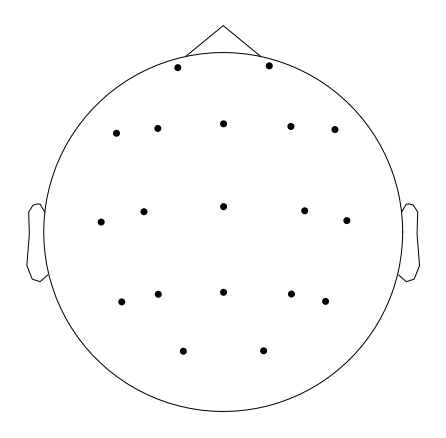

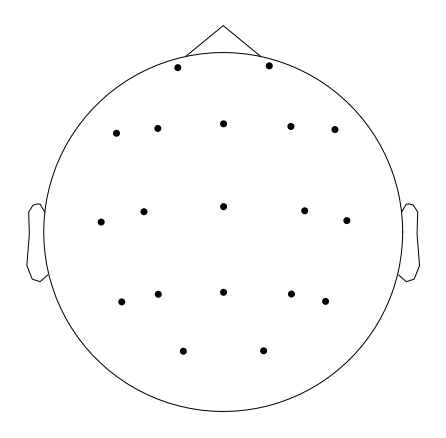

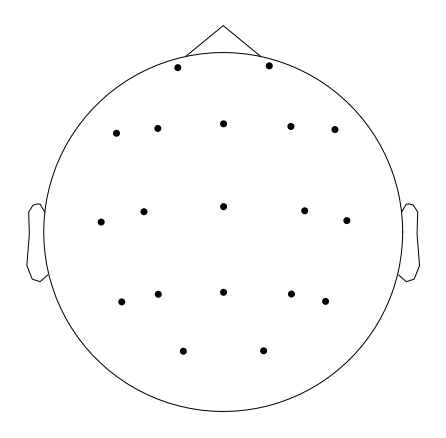

In [ ]:
### определяем схему монтажа, входные параметры: тип монтажа, размер головы (радиус в метрах, по умолчанию 95 мм)
montage = mne.channels.make_standard_montage('standard_1020') # расположение электродов в соответствии с международной системой 10-20 
### установить монтаж
rec1.set_montage(montage);  # вместо raw указывается название конкретной записи (rec1, rec2 или rec3)
### визуализация схемы монтажа
rec1.plot_sensors()

montage = mne.channels.make_standard_montage('standard_1020') # расположение электродов в соответствии с международной системой 10-20 
### установить монтаж
rec2.set_montage(montage);  # вместо raw указывается название конкретной записи (rec1, rec2 или rec3)
### визуализация схемы монтажа
rec2.plot_sensors()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


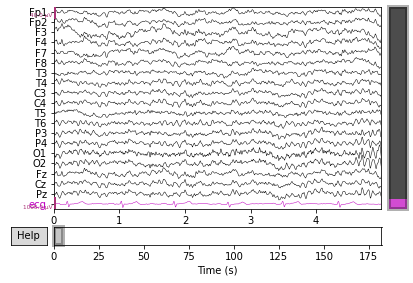

Effective window size : 4.096 (s)


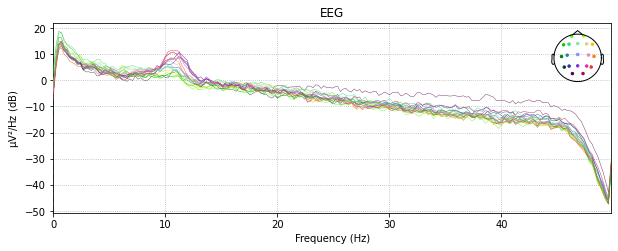

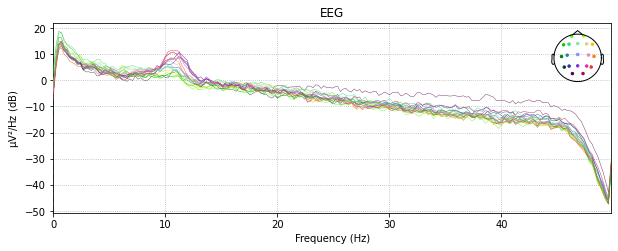

In [ ]:
rec1.plot(duration=5, n_channels=30) # визуализация необработанных данных
rec1.plot_psd(fmax=50) # спектральная плотность мощности (ограничиваемся частотами до 50 Гц)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


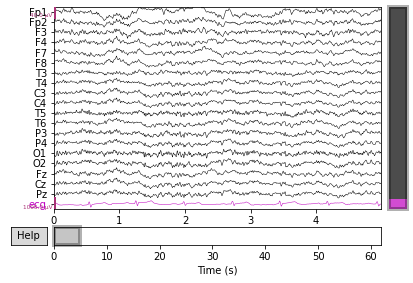

Effective window size : 4.096 (s)


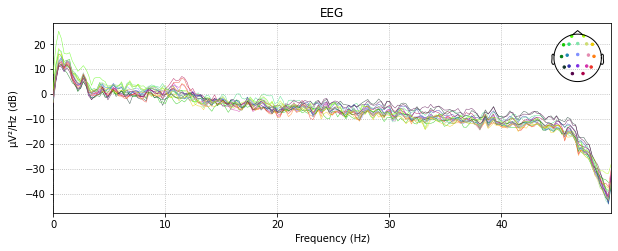

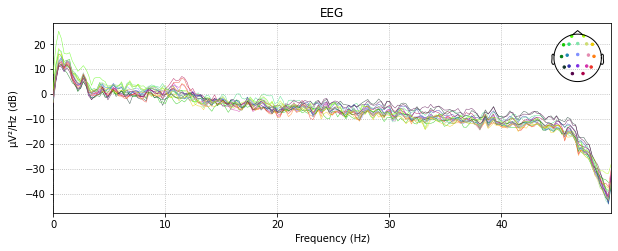

In [ ]:
rec2.plot(duration=5, n_channels=30) # визуализация необработанных данных
rec2.plot_psd(fmax=50) # спектральная плотность мощности (ограничиваемся частотами до 50 Гц)

In [ ]:
### удалить канал (если нужно!)
rec1.drop_channels('ecg')
rec2.drop_channels('ecg')

<RawEDF | Subject06_2.edf, 19 x 31000 (62.0 s), ~4.5 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


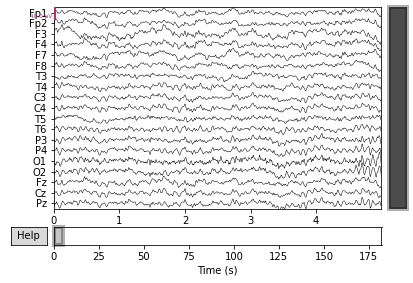

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


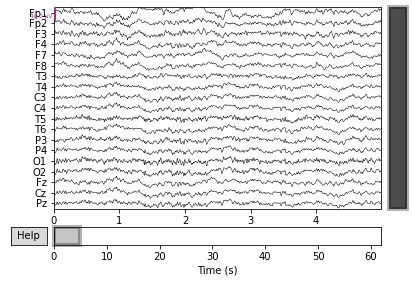

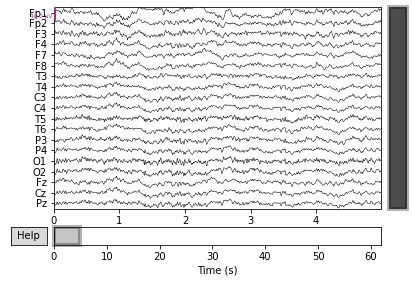

In [ ]:
rec1.plot(duration=5, n_channels=30) 
rec2.plot(duration=5, n_channels=30) 

In [ ]:
rec1.info['bads']
rec2.info['bads']

[]

In [ ]:
### интерполяция плохих каналов
rec1.interpolate_bads(reset_bads=True, mode='accurate')
rec2.interpolate_bads(reset_bads=True, mode='accurate')

<ipython-input-144-a0a9167669cc>:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  rec1.interpolate_bads(reset_bads=True, mode='accurate')
<ipython-input-144-a0a9167669cc>:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  rec2.interpolate_bads(reset_bads=True, mode='accurate')


<RawEDF | Subject06_2.edf, 19 x 31000 (62.0 s), ~4.5 MB, data loaded>

In [ ]:
# расчет среднего референца по всем каналам
mne.set_eeg_reference(rec1);
mne.set_eeg_reference(rec2);

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)

Effective window size : 4.096 (s)


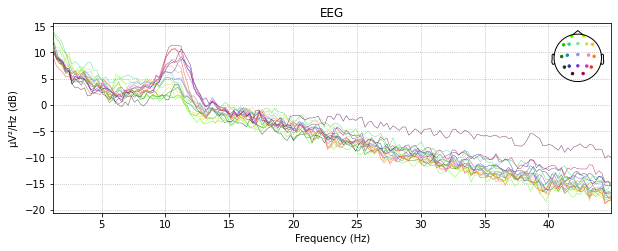

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)

Effective window size : 4.096 (s)


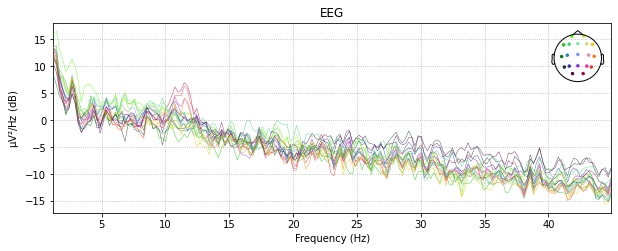

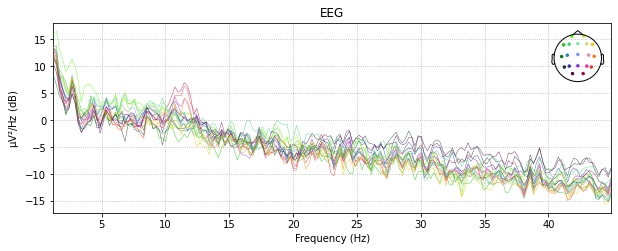

In [ ]:
### частотная фильтрация (выделение диапазона исследования)
rec1.filter(1, 45, fir_design='firwin', skip_by_annotation='edge')
rec1.plot_psd(fmin=1, fmax=45)

rec2.filter(1, 45, fir_design='firwin', skip_by_annotation='edge')
rec2.plot_psd(fmin=1, fmax=45)

In [ ]:
rec1.info['ch_names']
rec2.info['ch_names']

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'T3',
 'T4',
 'C3',
 'C4',
 'T5',
 'T6',
 'P3',
 'P4',
 'O1',
 'O2',
 'Fz',
 'Cz',
 'Pz']

In [ ]:
events = mne.make_fixed_length_events(rec1, duration=2.0)
events2 = mne.make_fixed_length_events(rec2, duration=2.0)
print(events)

[[    0     0     1]
 [ 1000     0     1]
 [ 2000     0     1]
 [ 3000     0     1]
 [ 4000     0     1]
 [ 5000     0     1]
 [ 6000     0     1]
 [ 7000     0     1]
 [ 8000     0     1]
 [ 9000     0     1]
 [10000     0     1]
 [11000     0     1]
 [12000     0     1]
 [13000     0     1]
 [14000     0     1]
 [15000     0     1]
 [16000     0     1]
 [17000     0     1]
 [18000     0     1]
 [19000     0     1]
 [20000     0     1]
 [21000     0     1]
 [22000     0     1]
 [23000     0     1]
 [24000     0     1]
 [25000     0     1]
 [26000     0     1]
 [27000     0     1]
 [28000     0     1]
 [29000     0     1]
 [30000     0     1]
 [31000     0     1]
 [32000     0     1]
 [33000     0     1]
 [34000     0     1]
 [35000     0     1]
 [36000     0     1]
 [37000     0     1]
 [38000     0     1]
 [39000     0     1]
 [40000     0     1]
 [41000     0     1]
 [42000     0     1]
 [43000     0     1]
 [44000     0     1]
 [45000     0     1]
 [46000     0     1]
 [47000     0

In [ ]:
epochs = mne.Epochs(rec1, events, tmin=-0.2, tmax=0.5, preload=True)
epochs2 = mne.Epochs(rec2, events2, tmin=-0.2, tmax=0.5, preload=True)

Not setting metadata
Not setting metadata
91 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 91 events and 351 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
31 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 31 events and 351 original time points ...
1 bad epochs dropped


In [ ]:
DATA=rec1.get_data()
DATA=rec2.get_data()

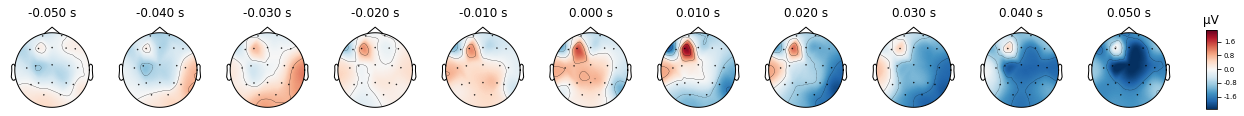

No projector specified for this dataset. Please consider the method self.add_proj.


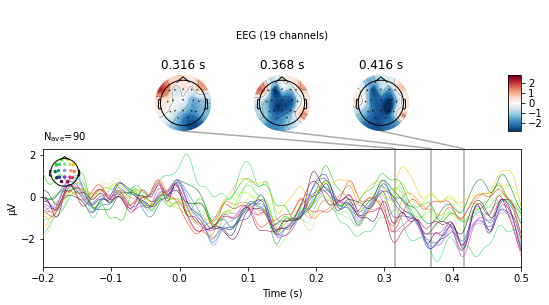

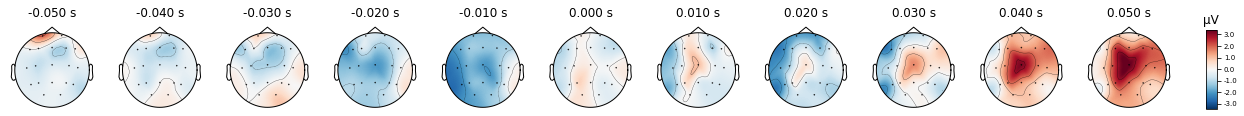

No projector specified for this dataset. Please consider the method self.add_proj.


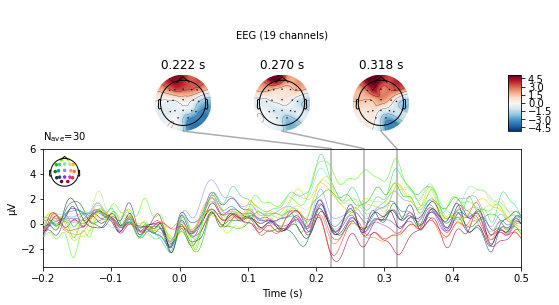

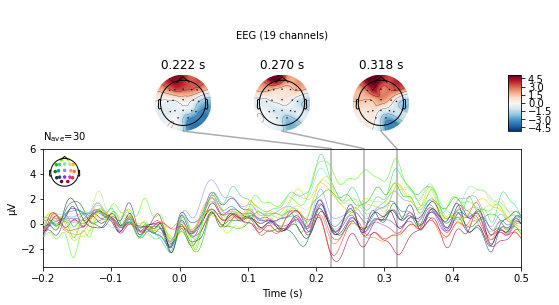

In [ ]:
evoked = epochs.average()
evoked.plot_topomap(times=np.linspace(-0.05, 0.05, 11))
evoked.plot_joint(times='peaks')

evoked2 = epochs2.average()
evoked2.plot_topomap(times=np.linspace(-0.05, 0.05, 11))
evoked2.plot_joint(times='peaks')

In [ ]:
eog_epochs = mne.preprocessing.create_eog_epochs(rec1, ch_name=['Fp1','Fp2'])
eog_epochs2 = mne.preprocessing.create_eog_epochs(rec2, ch_name=['Fp1','Fp2'])

Using EOG channels: Fp1, Fp2
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 220 significant peaks
Number of EOG events detected: 220
Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
Loading data for 220 events and 501 original time points ...
0 bad epochs dropped
Using EOG channels: Fp1, Fp2
EOG channel index for this su

Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


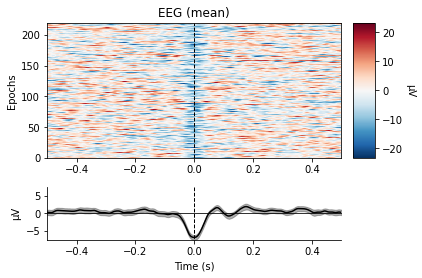

No projector specified for this dataset. Please consider the method self.add_proj.


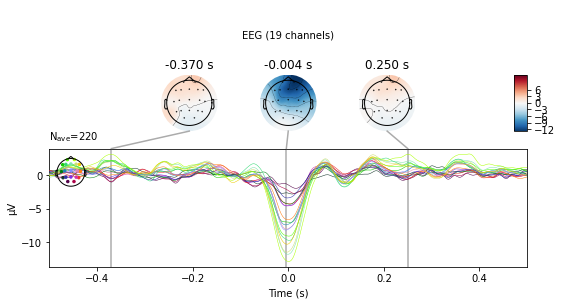

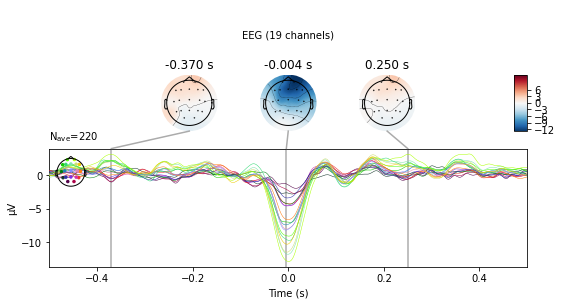

In [ ]:
# карта изображения эпох с графиком среднего ERP по артефактам
eog_epochs.plot_image(combine='mean') 

# нижний график отображает усредненные артефакты по каждому каналу
# топографическая карта показывает, в какой части головы наиболее выражена их амплитуда
eog_epochs.average().plot_joint()

Not setting metadata
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


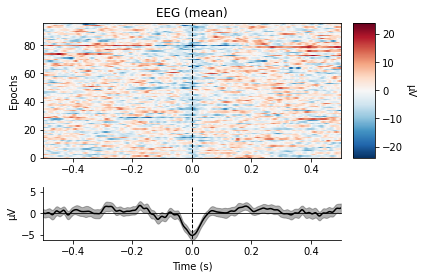

No projector specified for this dataset. Please consider the method self.add_proj.


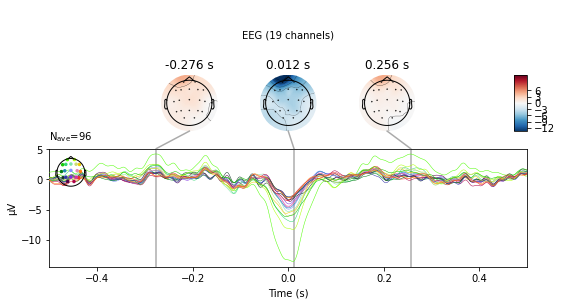

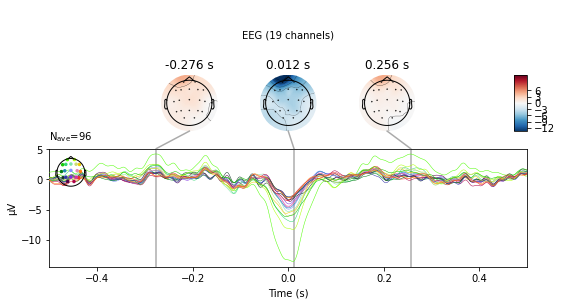

In [ ]:
# карта изображения эпох с графиком среднего ERP по артефактам
eog_epochs2.plot_image(combine='mean') 

# нижний график отображает усредненные артефакты по каждому каналу
# топографическая карта показывает, в какой части головы наиболее выражена их амплитуда
eog_epochs2.average().plot_joint()

In [ ]:
filt_raw = rec1.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)

In [ ]:
filt_raw2 = rec2.copy()
filt_raw2.load_data().filter(l_freq=1., h_freq=None)

In [ ]:
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(filt_raw) # обучение алгоритма на имеющихся данных

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


<ipython-input-165-6be9079cfc47>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=15, random_state=97)


Fitting ICA took 2.5s.


<ICA | raw data decomposition, fit (fastica): 91000 samples, 15 components, channels used: "eeg">

In [ ]:
ica2 = mne.preprocessing.ICA(n_components=15, random_state=97)
ica2.fit(filt_raw2) # обучение алгоритма на имеющихся данных

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components


<ipython-input-166-20e6ac7d1941>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica2 = mne.preprocessing.ICA(n_components=15, random_state=97)


Fitting ICA took 1.2s.


<ICA | raw data decomposition, fit (fastica): 31000 samples, 15 components, channels used: "eeg">

Creating RawArray with float64 data, n_channels=15, n_times=91000
    Range : 0 ... 90999 =      0.000 ...   181.998 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


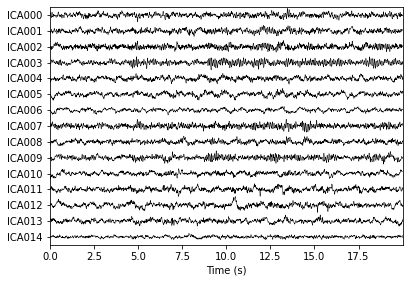

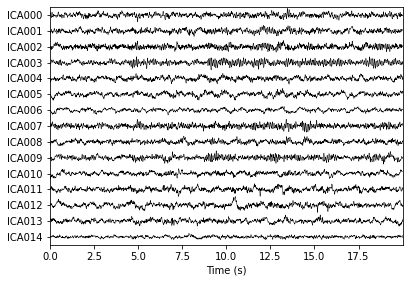

In [ ]:
rec1.load_data()
ica.plot_sources(rec1, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=15, n_times=31000
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


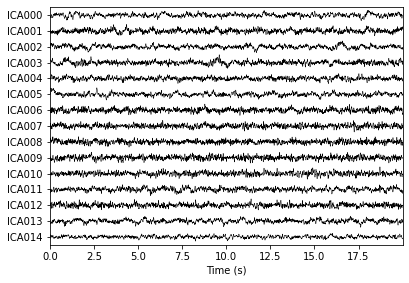

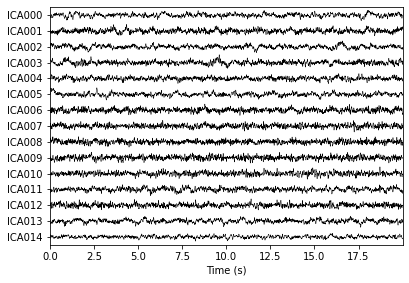

In [ ]:
rec2.load_data()
ica2.plot_sources(rec2, show_scrollbars=False)

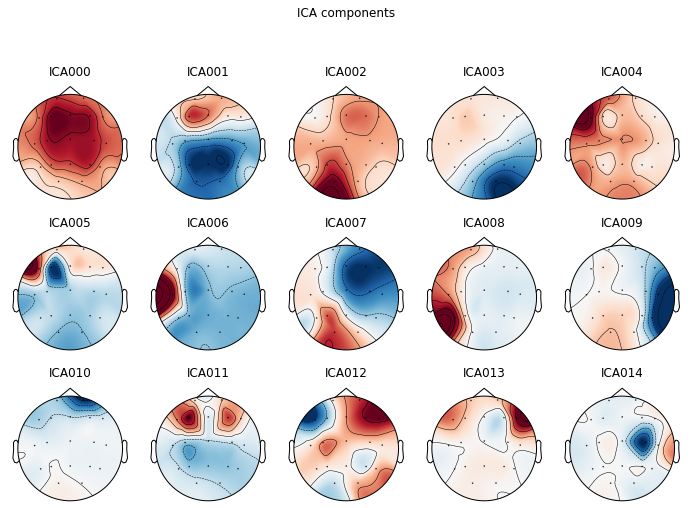

[<MNEFigure size 702x526.68 with 15 Axes>]

In [ ]:
ica.plot_components()

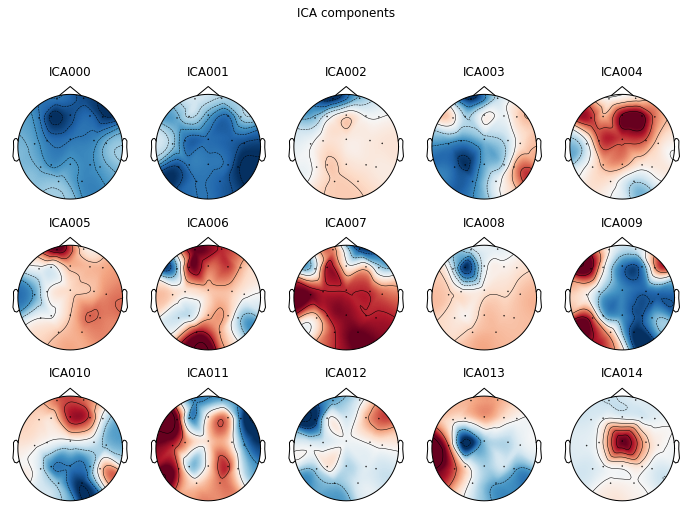

[<MNEFigure size 702x526.68 with 15 Axes>]

In [ ]:
ica2.plot_components()

In [ ]:
ica.plot_overlay(rec1, exclude=[0,7,10,12]) 

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components


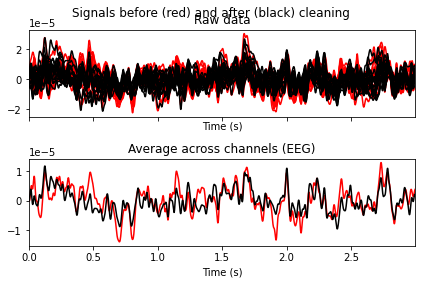

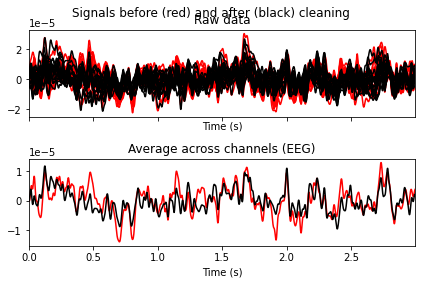

In [ ]:
ica2.plot_overlay(rec1, exclude=[0,2,5]) 

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


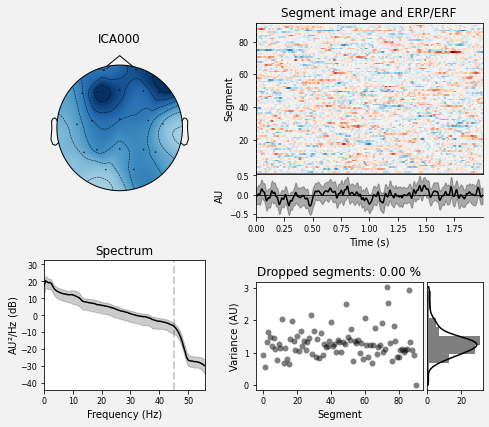

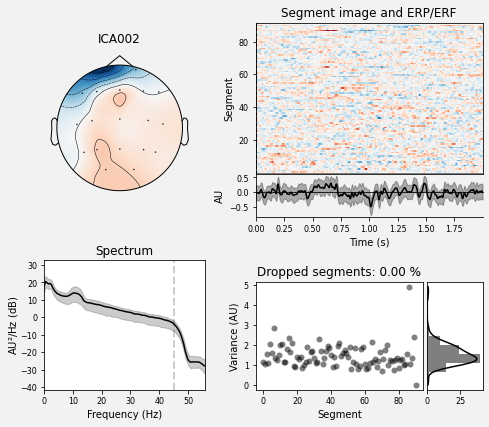

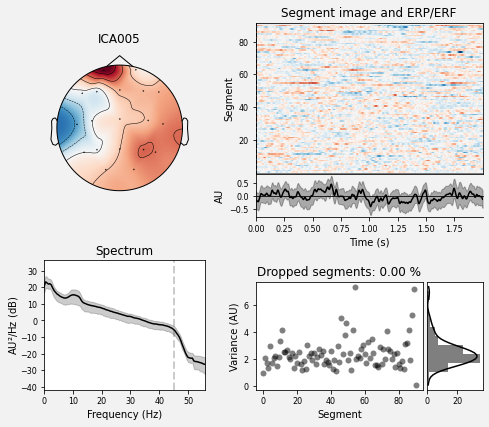

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [ ]:
ica2.plot_properties(rec1, picks=[0,2,5])

In [ ]:
ica.exclude=[0,7,10,12]

In [ ]:
ica2.exclude=[0,2,5]

In [ ]:
reconst_raw = rec1.copy()
ica.apply(reconst_raw)

In [ ]:
reconst_raw2 = rec2.copy()
ica2.apply(reconst_raw2)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


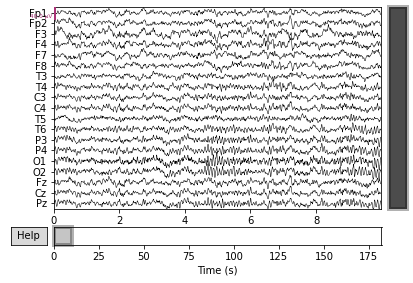

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


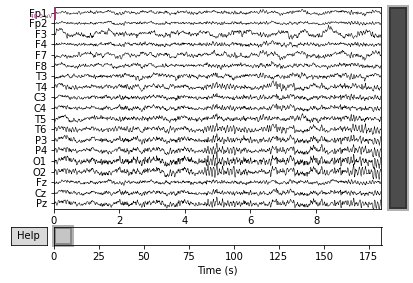

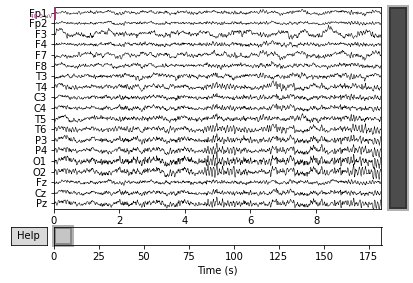

In [ ]:
rec1.plot()
reconst_raw.plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


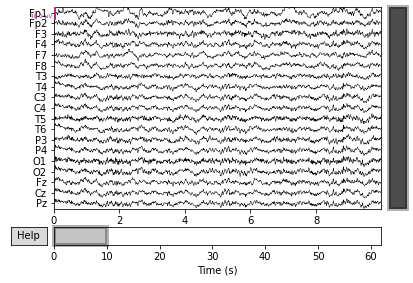

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


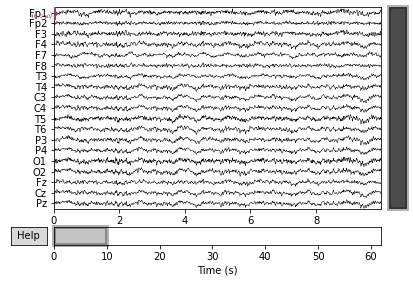

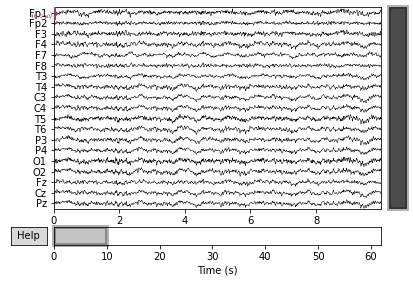

In [ ]:
rec2.plot()
reconst_raw2.plot()

In [ ]:
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 45)
]
tmin, tmax = -1., 3.

In [ ]:
rec1.info['ch_names']

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'T3',
 'T4',
 'C3',
 'C4',
 'T5',
 'T6',
 'P3',
 'P4',
 'O1',
 'O2',
 'Fz',
 'Cz',
 'Pz']

In [ ]:
frequency_map = []
ch_names=['Fp1','Fp2','F3','F4','F7','F8','T3','T4','C3','C4','T5','T6','P3','P4','O1','O2','Fz','Cz','Pz']
for band, fmin, fmax in iter_freqs:
    raw = reconst_raw2.copy()
    raw.load_data()

    # фильтрация
    raw.filter(fmin, fmax, n_jobs=1,  
               l_trans_bandwidth=1,  
               h_trans_bandwidth=1)     
    
    epochs = mne.preprocessing.create_eog_epochs(raw, ch_name=ch_names, tmin=-1., tmax=3., baseline=None) # эпохи связанные
    epochs.subtract_evoked()

    # Запись данных
    epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs.average()))
    del epochs
del raw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Using EOG channels: Fp1, Fp2, F3, F4, F7, F8, T3, T4, C3, C4, T5, T6, P3, P4, O1, O2, Fz, Cz, Pz
EOG channel index for this subject is: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass fil

In [ ]:
frequency_map

[(('Theta', 4, 7),
  <Evoked | '998' (average, N=50), -1 – 3 sec, baseline off, 19 ch, ~330 kB>),
 (('Alpha', 8, 12),
  <Evoked | '998' (average, N=303), -1 – 3 sec, baseline off, 19 ch, ~330 kB>),
 (('Beta', 13, 25),
  <Evoked | '998' (average, N=214), -1 – 3 sec, baseline off, 19 ch, ~330 kB>),
 (('Gamma', 30, 45),
  <Evoked | '998' (average, N=139), -1 – 3 sec, baseline off, 19 ch, ~330 kB>)]

In [ ]:
from mne.baseline import rescale
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)
from mne.stats import bootstrap_confidence_interval

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Text(0.5, 0, 'Time [ms]')

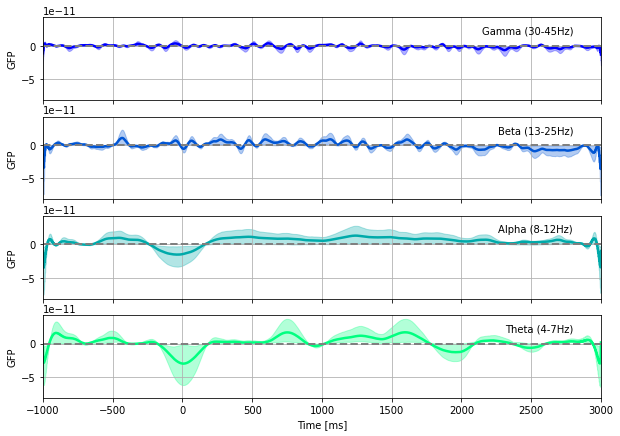

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 4))
for ((freq_name, fmin, fmax), average), color, ax in zip(
        frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel('Time [ms]')